# Higgs Boson Decaying to Tau Leptons

<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Project_HiggsTauTau-EventDisplay.jpg" width=700 align=left></img><br>

## <span style="color:Orange">Overview</span>

From [[1]](https://papers.nips.cc/paper_files/paper/2014/file/e1d5be1c7f2f456670de3d53c7b54f4a-Paper.pdf), “The Higgs boson is an elementary particle in the Standard Model of particle physics, produced by the quantum excitation of the Higgs field, one of the fields in particle physics theory.It is named after physicist Peter Higgs, who in 1964, along with six other scientists, proposed the mechanism, which suggested the existence of such a particle. Its existence was confirmed by the ATLAS and CMS collaborations based on collisions in the LHC at CERN.

On December 10, 2013, two of the physicists, Peter Higgs and François Englert, were awarded the Nobel Prize in Physics for their theoretical predictions. Although Higgs's name has come to be associated with this theory, several researchers between about 1964 and 1972 independently developed different parts of it.”

The Standard Model (SM) of particle physics predicts the existence of a Higgs boson. It was discovered at CERN in 2012 by the ATLAS and CMS collaborations, with contributions to the data analysis in the discovery paper by Neubauer’s research group at Illinois. See this [video](https://youtu.be/__btEwKQB2I?t=1) for more about the central role that the Higgs boson plays in the standard model of particle physics and Illinois researchers' role in its discovery.

## <span style="color:Orange">Data Sources</span>

Original Source
* https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz

File URLs
* https://courses.physics.illinois.edu/phys503/fa2023/data/projects/HiggsTauTau/HIGGS.csv.gz

## <span style="color:Orange">Questions</span>

### <span style="color:LightGreen">Question 01</span>

What is the Large Hadron Collider (LHC)? What is it about the LHC that makes it possible to produce heavy particles like the Higgs boson?

### <span style="color:LightGreen">Question 02</span>

The Higgs boson is the last particle in the SM to be discovered and completes the constituent picture of that theory in the SM. In what way(s) does the Higgs boson play a particularly important role in the SM?

### <span style="color:LightGreen">Question 03</span>

The Higgs boson is unstable and rapidly decays. The Higgs boson has several ways that it can decay (“decay modes”). What are these decay modes and what is decay probability for each? (Obviously not asking for any calculation here, just information from available references).

### <span style="color:LightGreen">Question 04</span>

Briefly describe the ATLAS and CMS experiments that collect proton-proton collision data at the LHC to study the Higgs boson.

---

The remaining questions refer to the following data source:

https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz

### <span style="color:LightGreen">Question 05</span>

What is the size and shape of the data set?

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import os.path
import subprocess
import autograd.numpy as anp
import autograd

In [3]:
def wget_data(url: str):
    local_path = './tmp_data'
    p = subprocess.Popen(["wget", "-nc", "-P", local_path, url], stderr=subprocess.PIPE, encoding='UTF-8')
    rc = None
    while rc is None:
      line = p.stderr.readline().strip('\n')
      if len(line) > 0:
        print(line)
      rc = p.poll()

def locate_data(name, check_exists=True):
    local_path='./tmp_data'
    path = os.path.join(local_path, name)
    if check_exists and not os.path.exists(path):
        raise RuntimeError('No such data file: {}'.format(path))
    return path

In [4]:
wget_data('https://courses.physics.illinois.edu/phys503/fa2023/data/projects/HiggsTauTau/HIGGS.csv.gz')

Streaming output truncated to the last 5000 lines.
2500450K .......... .......... .......... .......... .......... 90% 89.6M 13s
2500500K .......... .......... .......... .......... .......... 90% 11.1M 13s
2500550K .......... .......... .......... .......... .......... 90% 50.8M 13s
2500600K .......... .......... .......... .......... .......... 90% 30.5M 13s
2500650K .......... .......... .......... .......... .......... 90% 39.5M 13s
2500700K .......... .......... .......... .......... .......... 90% 42.5M 13s
2500750K .......... .......... .......... .......... .......... 90% 55.1M 13s
2500800K .......... .......... .......... .......... .......... 90% 5.58M 13s
2500850K .......... .......... .......... .......... .......... 90% 61.3M 13s
2500900K .......... .......... .......... .......... .......... 90% 22.7M 13s
2500950K .......... .......... .......... .......... .......... 90% 77.2M 13s
2501000K .......... .......... .......... .......... .......... 90% 9.41M 13s
2501050K ....

In [5]:
data = pd.read_csv(locate_data('HIGGS.csv.gz')).values

In [6]:
print(data.shape)

(10999999, 29)


The data has 10999999 datapoints has 28 features. It's shape is (10999999,29)

### <span style="color:LightGreen">Question 06</span>

The data has been produced using Monte Carlo simulations. The first 21 features (columns 2-22) are kinematic properties measured by the particle detectors in the LHC accelerator. The last seven features are functions of the first 21 features; these are high-level features derived by physicists to help discriminate between the two classes. When you read through the reference paper [[1]](https://papers.nips.cc/paper_files/paper/2014/file/e1d5be1c7f2f456670de3d53c7b54f4a-Paper.pdf), what particle properties do those 28 features represent?

### <span style="color:LightGreen">Question 07</span>

Using the data set, Could you draw the histogram of 28 normalized features for signal and background separately? Could you tell the significant differences from these histograms?

In [15]:
signal = data[data[:,0] == 0]
background = data[data[:,0] == 1]

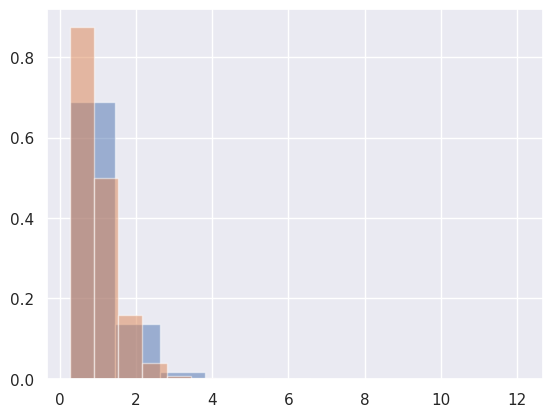

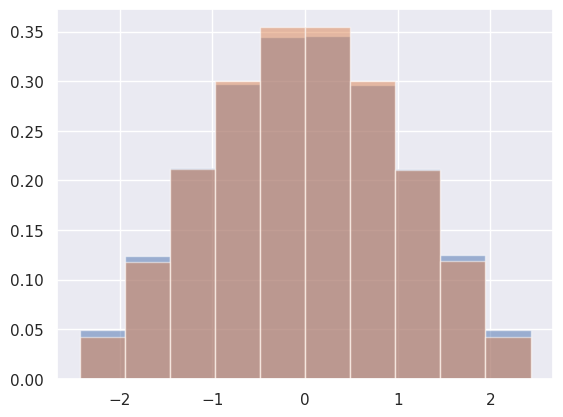

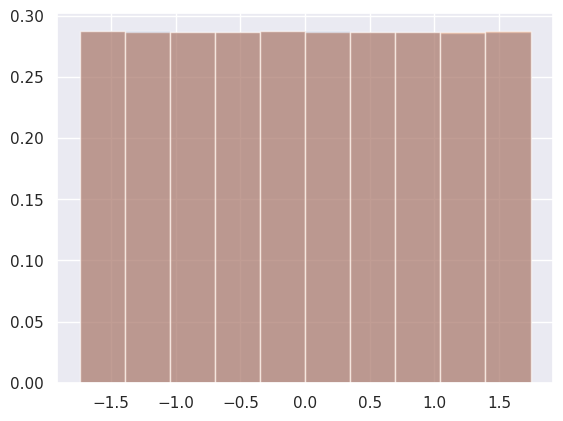

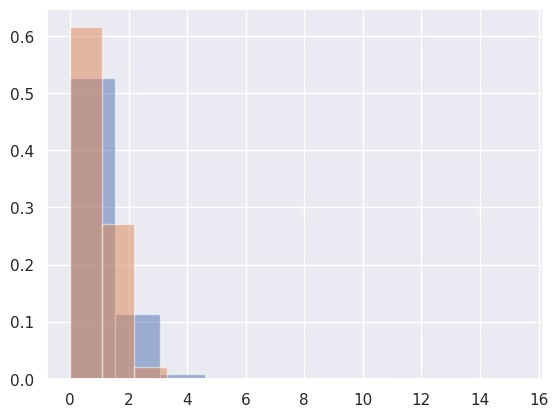

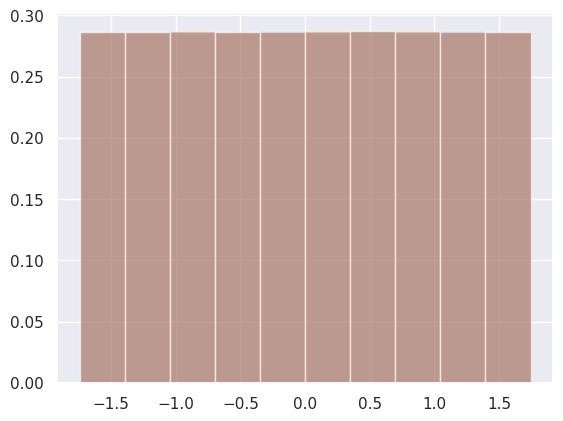

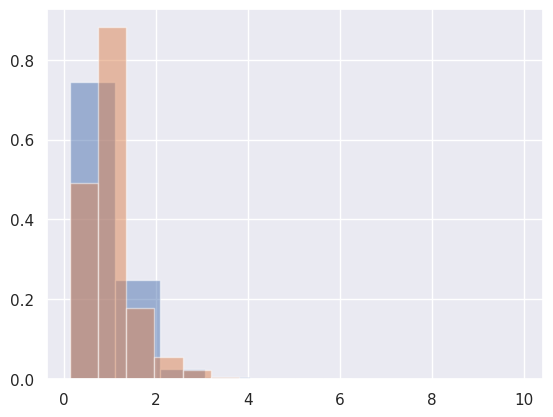

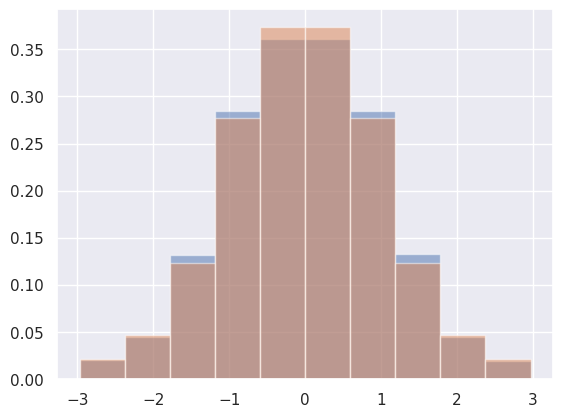

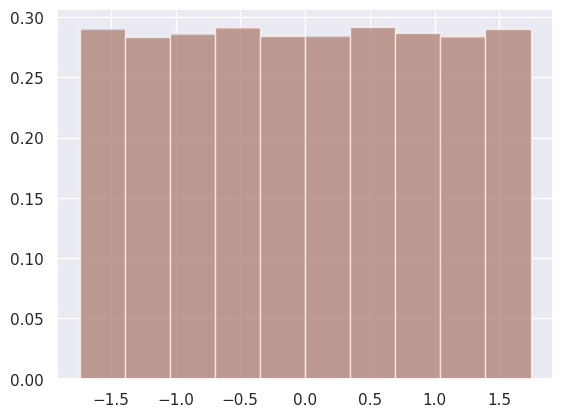

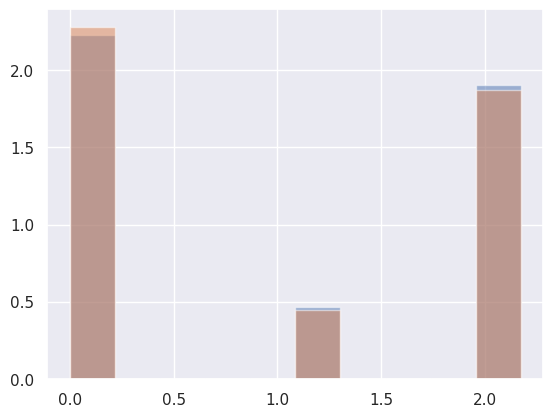

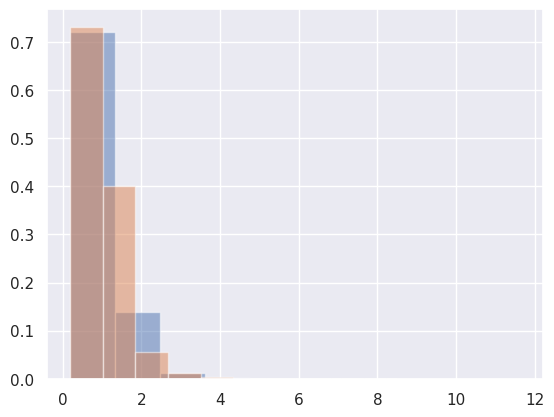

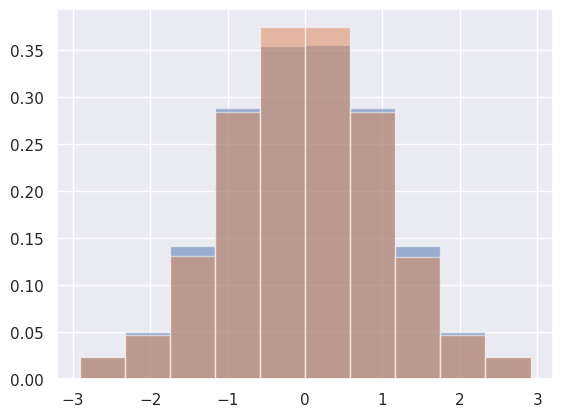

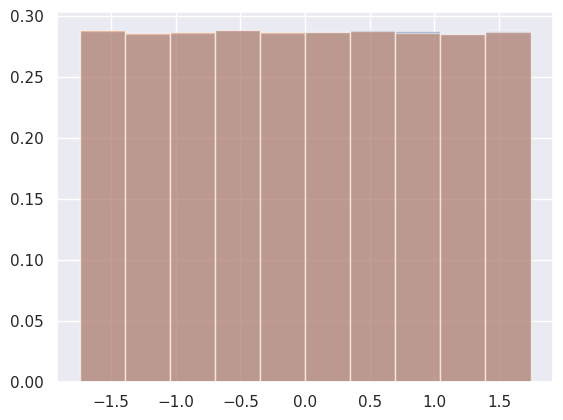

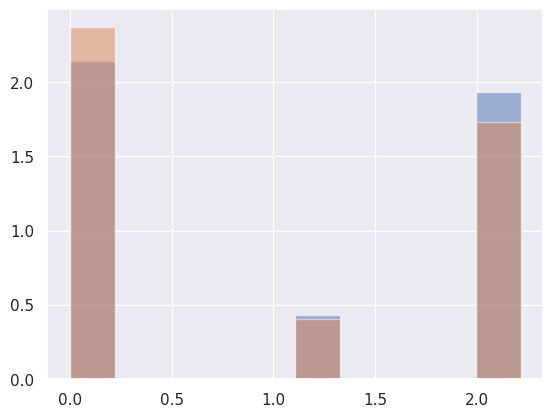

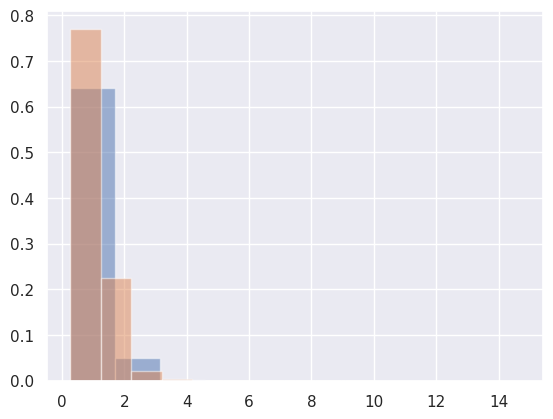

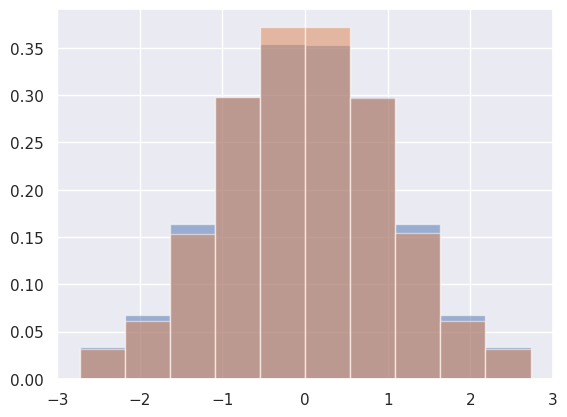

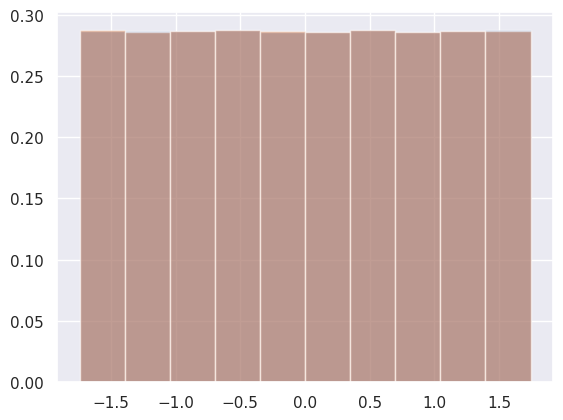

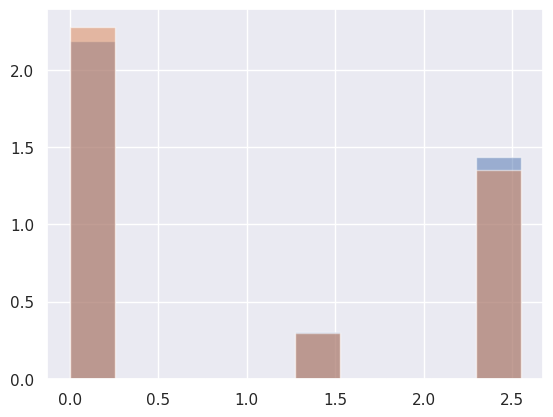

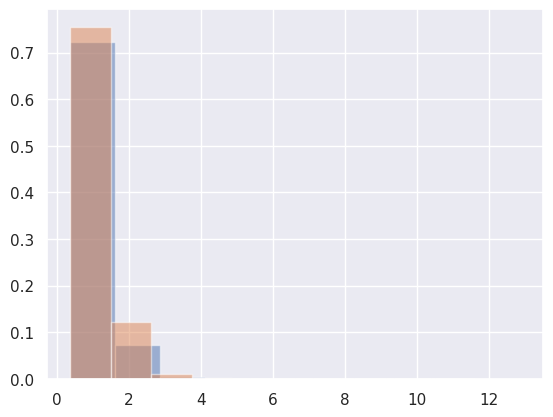

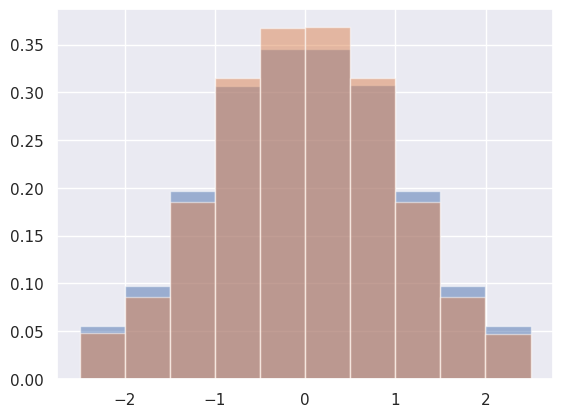

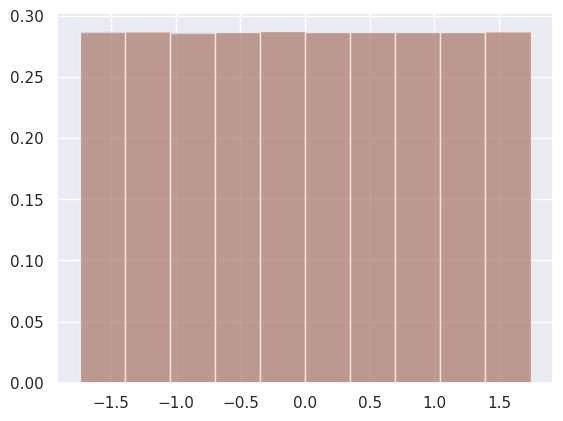

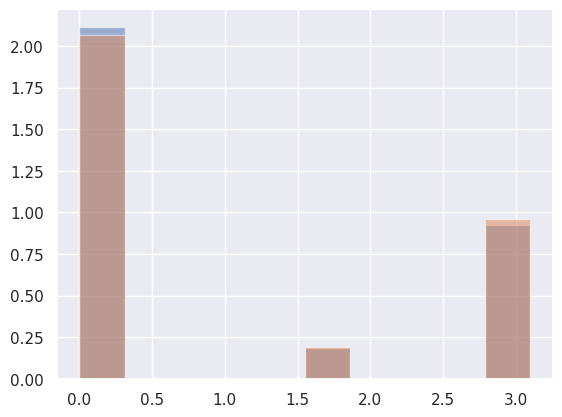

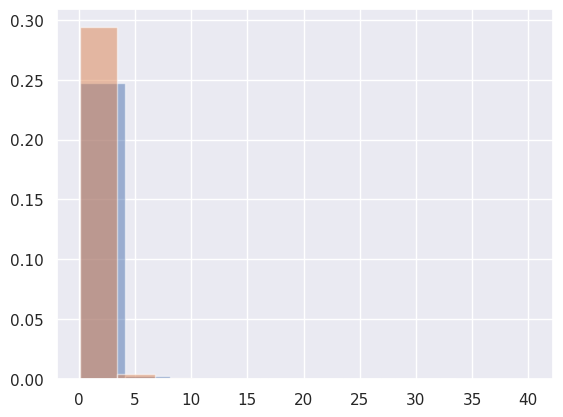

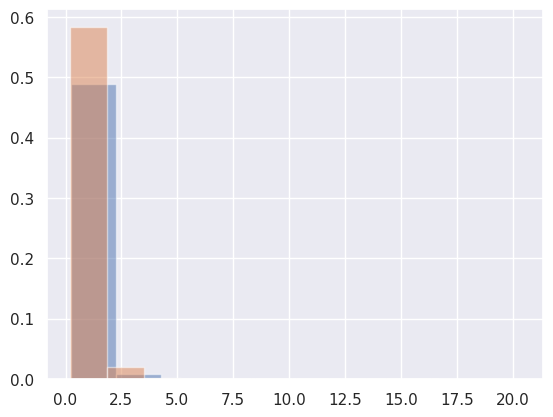

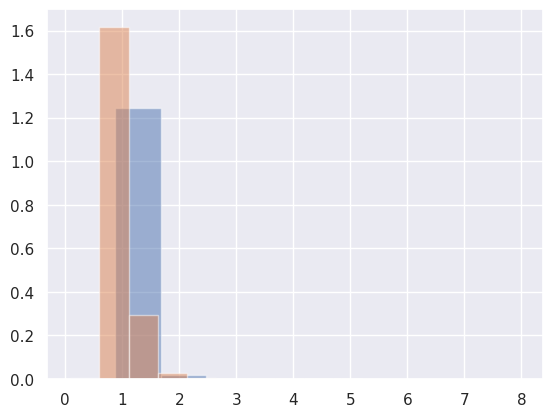

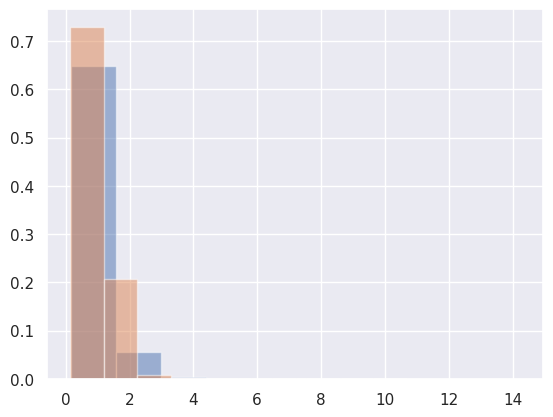

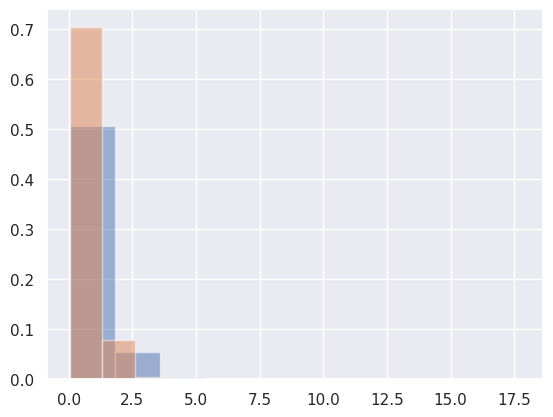

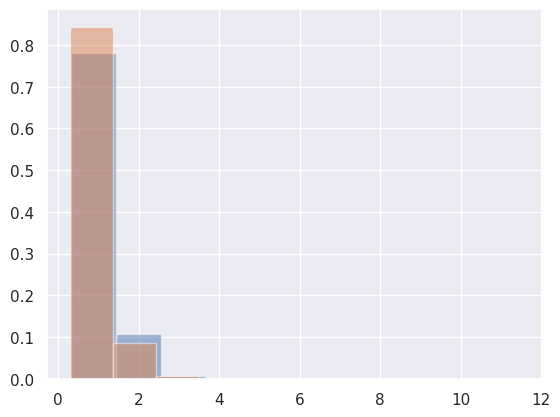

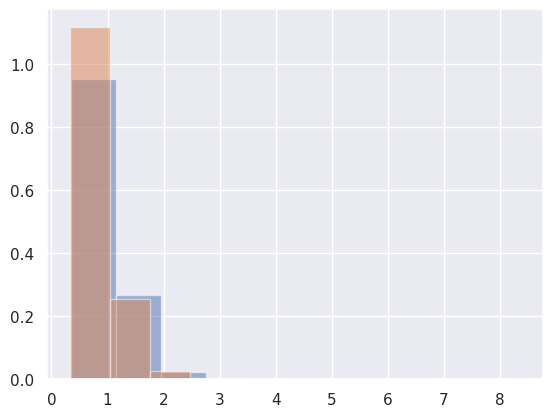

In [24]:
for i in range(1,29):
  plt.hist(signal[:,i], density=True, label = 'signal', alpha = 0.5)
  plt.hist(background[:,i], density=True, label = 'background', alpha = 0.5)
  plt.show()

There is no way you could tell any significant differences from the signal and background merely by looking at these histograms.

---

## <span style="color:Orange">References</span>

__[<span style="color:Red">1</span>]__ P.J. Sadowski, D. Whiteson, P. Baldi, "Searching for Higgs Boson Decay Modes with Deep Learning", _Advances in Neural Information Processing Systems 27 (NIPS 2014)_ (https://papers.nips.cc/paper/2014/hash/e1d5be1c7f2f456670de3d53c7b54f4a-Abstract.html)


---

## <span style="color:Orange">Acknowledgements</span>

* Initial version: Mark Neubauer

© Copyright 2023